## Robust Regression for Machine Learning in Python

In [1]:
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

- Defining Synthetic Rergression Dataset

In [2]:
X, y = make_regression(n_samples = 100, n_features = 1, tail_strength = 0.9, effective_rank = 1,
                      n_informative = 1, noise = 3, bias = 50, random_state = 1)

- Adding outliers to the input variables

In [3]:
def get_dataset():
    X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, 
                           effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
# add some artificial outliers
    seed(1)
    for i in range(10):
        factor = randint(2, 4)
        if random() > 0.5:
            X[i] += factor * X.std()
        else:
            X[i] -= factor * X.std()
    return X, y

In [4]:
X,y = get_dataset()
print(X.shape, y.shape)

(100, 1) (100,)


- plotting the data

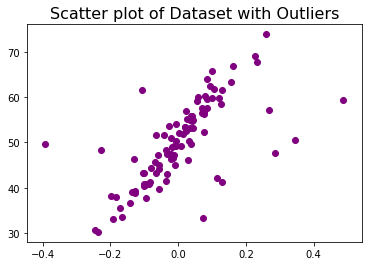

In [5]:
pyplot.scatter(X,y, color = 'purple')
pyplot.title("Scatter plot of Dataset with Outliers", size = 16)
pyplot.show();

## Robust Regression Algorithms

### Linear Regression

In [6]:
def evaluate_model(X, y, model):
    cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = -1)
    return absolute(scores)

In [7]:
def plot_best_fit(X, y, model):
    model.fit(X, y)
    pyplot.scatter(X, y)
    xaxis = arange(X.min(), X.max(), 0.01)
    yaxis = model.predict(xaxis.reshape((len(xaxis),1)))
    pyplot.plot(xaxis, yaxis, color = 'r')
    pyplot.title(type(model).__name__, size = 16)
    pyplot.show()

Mean MAE: 5.260 (1.149)


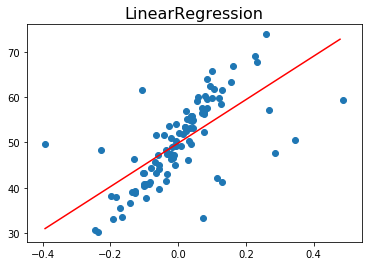

In [8]:
model = LinearRegression()
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
plot_best_fit(X, y, model)

## Huber Regression

Mean MAE: 4.435 (1.868)


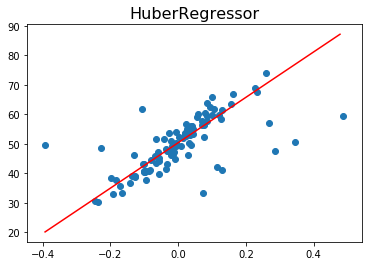

In [9]:
model = HuberRegressor()
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
plot_best_fit(X, y, model)

## RANSAC Regression

Mean MAE: 4.428 (2.230)


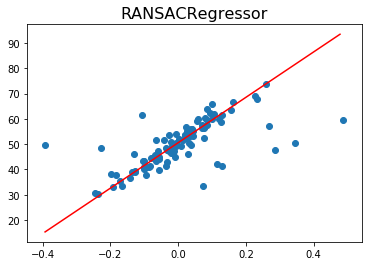

In [10]:
model = RANSACRegressor()
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
plot_best_fit(X, y, model)

## Theil Sen Regression

Mean MAE: 4.371 (1.961)


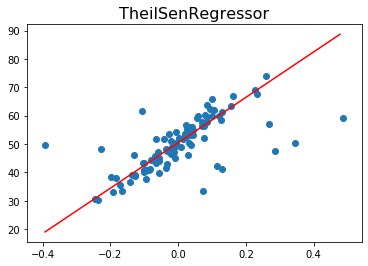

In [11]:
model = TheilSenRegressor()
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
plot_best_fit(X, y, model)

## Comparing Model Performances

>Linear 5.260 (1.149)
>Huber 4.435 (1.868)
>RANSAC 4.414 (2.120)
>TheilSen 4.371 (1.961)


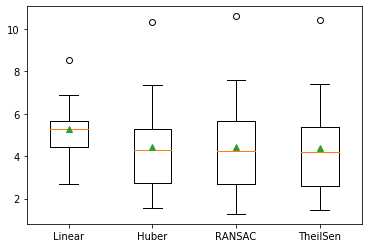

In [12]:
def get_models():
    models = dict()
    models['Linear'] = LinearRegression()
    models['Huber'] = HuberRegressor()
    models['RANSAC'] = RANSACRegressor()
    models['TheilSen'] = TheilSenRegressor()
    return models
def evalute_model(X, y, model, name):
# define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
    scores = absolute(scores)
    return scores
models = get_models()
results = dict()
for name, model in models.items():
# evaluate the model
    results[name] = evalute_model(X, y, model, name)
# summarize progress
    print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))
# plot model performance for comparison
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)
pyplot.show()

We can clearly see the distributions for the robust regression algorithms sitting and extending lower than the linear regression algorithm.

## Comparision based on line of best fit

In [13]:
def get_models():
    models = list()
    models.append(LinearRegression())
    models.append(HuberRegressor())
    models.append(RANSACRegressor())
    models.append(TheilSenRegressor())
    return models

def plot_best_fit(X, y, xaxis, model):
# fit the model on all data
    model.fit(X, y)
# calculate outputs for grid across the domain
    yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
# plot the line of best fit
    pyplot.plot(xaxis, yaxis, label=type(model).__name__)

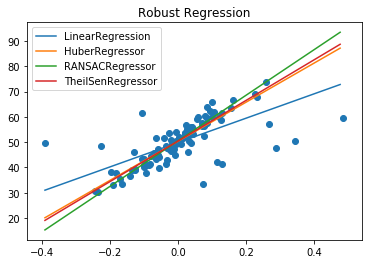

In [14]:
X, y = get_dataset()
# define a uniform grid across the input domain
xaxis = arange(X.min(), X.max(), 0.01)
for model in get_models():
# plot the line of best fit
    plot_best_fit(X, y, xaxis, model)
# plot the dataset
pyplot.scatter(X, y)
# show the plot
pyplot.title('Robust Regression')
pyplot.legend()
pyplot.show()

We caan  cclearly see that the line of Linear Regression is quite off the axis whereas other Robust models follows the data well.